In [21]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [22]:
%%R
suppressPackageStartupMessages({
  suppressMessages({
    library(data.table)
    library(dplyr)
    library(learnr)
    library(microbenchmark)
    library(parallel)
    library(parallelly)
    library(profvis)
    library(Rcpp)
    library(styler)
  })
})

## Measuring Speed with Microbenchmark
One way of measuring the time taken to run an R function is to invoke the `Sys.time()` function from the `base` R package. Consider the following toy function:

In [23]:
%%R
sleep <- function(sleep_time, print_string = FALSE) {
  # type checking
  stopifnot(typeof(sleep_time) == "double", sleep_time >= 0)
  
  # sleeping
  Sys.sleep(sleep_time)
  
  # print a string if print_string is TRUE
  if (print_string) 
  {
    print("I am awake now")
  }
  
}

 This function takes an input variable called `sleep_time`, checks that `sleep_time` is a positive number, pauses execution for `sleep_time` seconds, then prints "I am awake now" to the console. Naturally, the functions you may work with are more interesting than this simple toy function, but it remains useful from a pedagogical perspective. Suppose we want to time this function using `Sys.time()`, we can do so as follows:

In [24]:
%%R
t_start <- Sys.time()
sleep(5)
t_end <- Sys.time()

t_end - t_start

Time difference of 5.005211 secs


The above code times the execution of `sleep()` exactly once. Due to uncontrollable variations the time taken to run a function will not be exactly the same every time we run it. Hence, we may want to run the function many times to get an idea of the distribution of its run time. To do so we could perform the following:

In [25]:
%%R
# Run the function n_runs times and report the average time
n_runs <- 10
sleep_time <- 0.1
time_taken <- system.time(replicate(n_runs, sleep(sleep_time)))
avg_time <- time_taken["elapsed"] / n_runs
avg_time

elapsed 
 0.1041 


The `microbenchmark()` function included in the `microbenchmark` package provides a more accurate alternative. From the description in the documentation, see `?microbenchmark`, `microbenchmark` does the following:

-   Tries hard to accurately measure only the time take to evaluate the function.
-   Uses sub-millisecond timing functions built into your OS for increased accuracy.

Let's try it out.

In [26]:
%%R

# benchmark sleep(0.1) ten times and report the results in nanoseconds
results <- microbenchmark(sleep(0.1), times = 100, unit = 'ns')
results_summary <- summary(results)
print(results_summary$min/1e9)
print(results_summary$mean/1e9) 
print(results_summary$max/1e9)

[1] 0.09862804
[1] 0.1024422
[1] 0.1035893


The `microbenchmark` function provides additional information over the approaches above, including the minimum, maximum and mean evaluation time. Let's plot a histogram of the results.

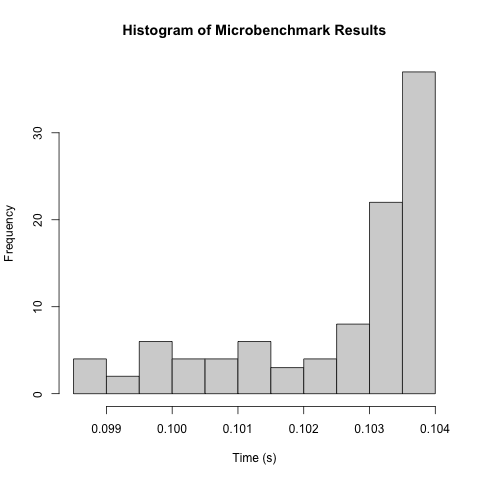

In [27]:
%%R
hist(results$time/1e9, xlab = "Time (s)", main = "Histogram of Microbenchmark Results")

### Exercise
Try microbenchmarking one of your own functions.